In [64]:
#import of libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [65]:
#load the data 
fileloc='/home/ex5/21MIS1006/cardata.csv'
dataset=pd.read_csv(fileloc)
dataset.head()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [66]:
#displaying Info of the dataset
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying_price       1728 non-null   object
 1   maintenance_cost   1728 non-null   object
 2   number_of_doors    1728 non-null   object
 3   number_of_persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [67]:
# getting the different categories in each column and their count 
col_names=dataset[['buying_price','maintenance_cost','number_of_doors','number_of_persons','lug_boot','safety','decision']]
for col in col_names:
    print(dataset[col].value_counts()) 

vhigh    432
high     432
med      432
low      432
Name: buying_price, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintenance_cost, dtype: int64
2        432
3        432
4        432
5more    432
Name: number_of_doors, dtype: int64
2       576
4       576
more    576
Name: number_of_persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64


In [68]:
# check missing values in variables
dataset.isnull().sum()

buying_price         0
maintenance_cost     0
number_of_doors      0
number_of_persons    0
lug_boot             0
safety               0
decision             0
dtype: int64

In [69]:
#we are going to convert our dataset from string to unique number 
from sklearn.preprocessing import LabelEncoder

In [70]:
numdata=LabelEncoder()
#to convert buying_price  data
dataset.buying_price =numdata.fit_transform(dataset['buying_price'])
#to convert maintenance_cost  data
dataset.maintenance_cost =numdata.fit_transform(dataset['maintenance_cost'])
#to convert number_of_doors  data
dataset.number_of_doors =numdata.fit_transform(dataset['number_of_doors'])
#to convert number_of_persons  data
dataset.number_of_persons =numdata.fit_transform(dataset['number_of_persons'])
#to convert lug_boot  data
dataset.lug_boot =numdata.fit_transform(dataset['lug_boot'])
#to convert safety data
dataset.safety =numdata.fit_transform(dataset['safety'])
#to convert decision data
dataset.decision =numdata.fit_transform(dataset['decision'])
dataset.head()

,buying_price,maintenance_cost,number_of_doors,number_of_persons,lug_boot,safety,decision
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [71]:
#Splitting the dataset 

X1 = dataset.drop(['decision'],axis=1)
y1 = dataset['decision']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

['buying_price', 'maintenance_cost', 'number_of_doors', 'number_of_persons', 'lug_boot', 'safety']


model=tree.DecisionTreeClassifier(criterion='entropy',splitter='random')
model=model.fit(X,y)

#we install pydotplus the code for it is "pip install pydotplus"
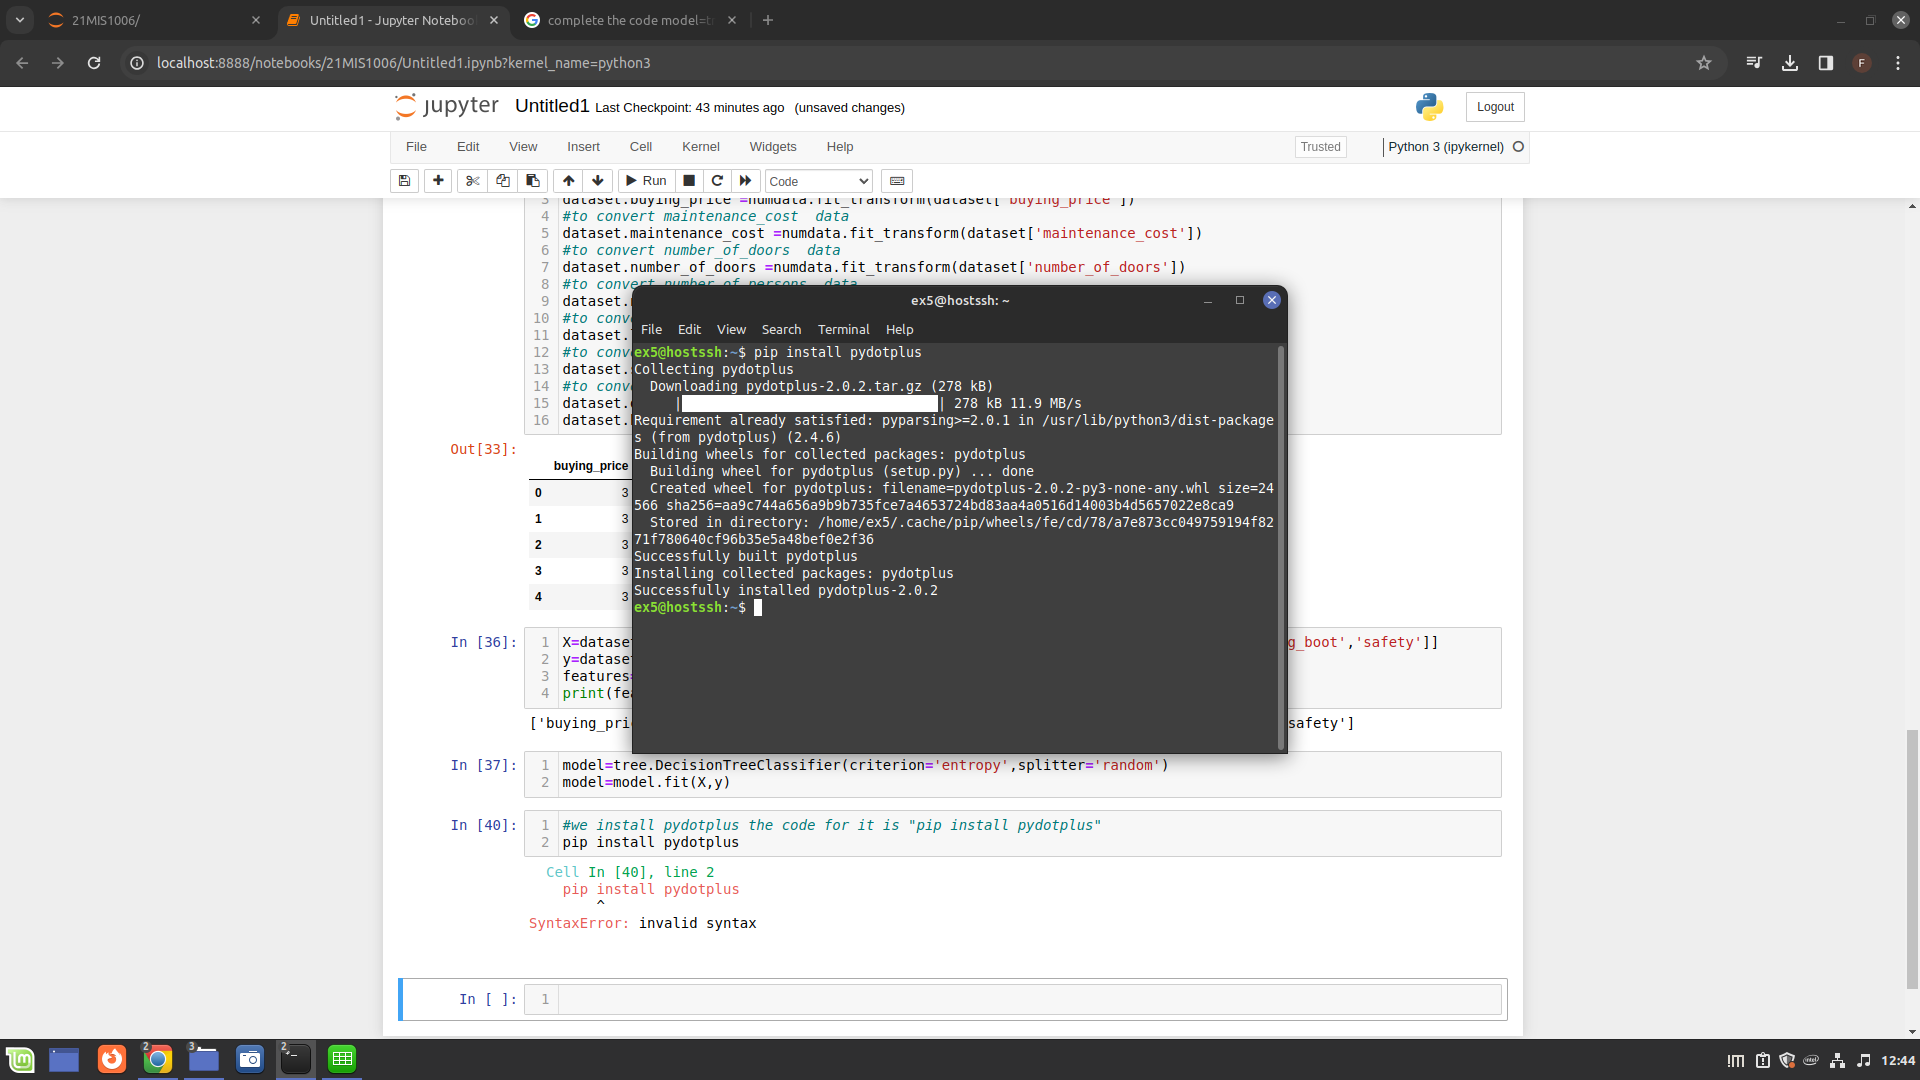


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [73]:
#Gini Impurity tells us what is the probability of misclassifying an observation. 
#Note that the lower the Gini the better the split
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.469\nsamples = 1382\nvalue = [325, 55, 950, 52]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 452\nvalue = [0, 0, 452, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.585\nsamples = 930\nvalue = [325, 55, 498, 52]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\ngini = 0.615\nsamples = 325\nvalue = [181, 24, 68, 52]'),
 Text(0.125, 0.125, 'gini = 0.607\nsamples = 241\nvalue = [137, 24, 28, 52]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 84\nvalue = [44, 0, 40, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.436\nsamples = 605\nvalue = [144, 31, 430, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 294\nvalue = [0, 0, 294, 0]'),
 Text(0.875, 0.125, 'gini = 0.584\nsamples = 311\nvalue = [144, 31, 136, 0]')]

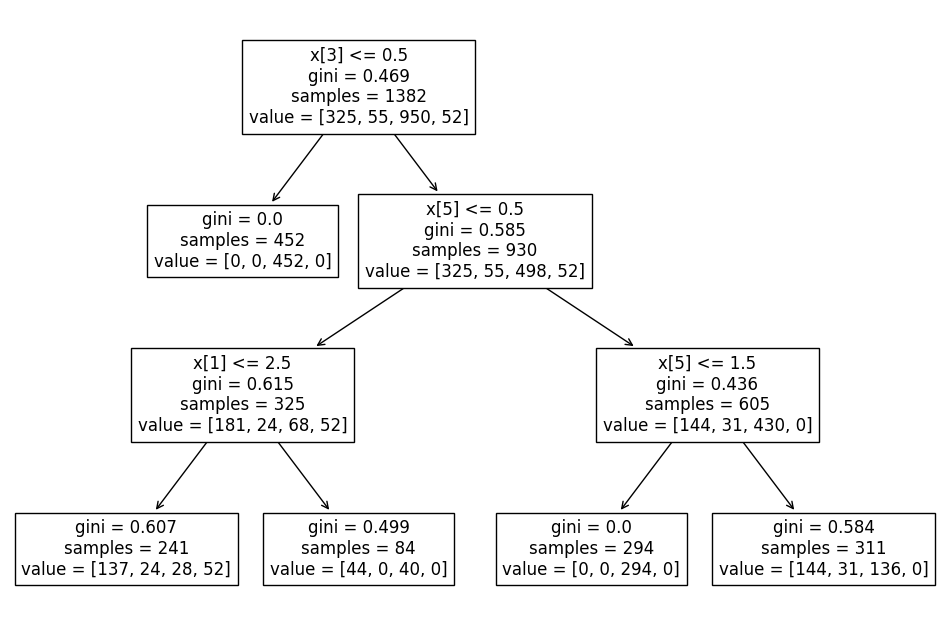

In [74]:
#Plot the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [76]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.7890
Training-set accuracy score: 0.7750


In [77]:
#Decision Tree Classifier using entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.375, 0.875, 'x[3] <= 0.5\nentropy = 1.226\nsamples = 1382\nvalue = [325, 55, 950, 52]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 452\nvalue = [0, 0, 452, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 1.486\nsamples = 930\nvalue = [325, 55, 498, 52]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\nentropy = 1.643\nsamples = 325\nvalue = [181, 24, 68, 52]'),
 Text(0.125, 0.125, 'entropy = 1.633\nsamples = 241\nvalue = [137, 24, 28, 52]'),
 Text(0.375, 0.125, 'entropy = 0.998\nsamples = 84\nvalue = [44, 0, 40, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\nentropy = 1.063\nsamples = 605\nvalue = [144, 31, 430, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 294\nvalue = [0, 0, 294, 0]'),
 Text(0.875, 0.125, 'entropy = 1.368\nsamples = 311\nvalue = [144, 31, 136, 0]')]

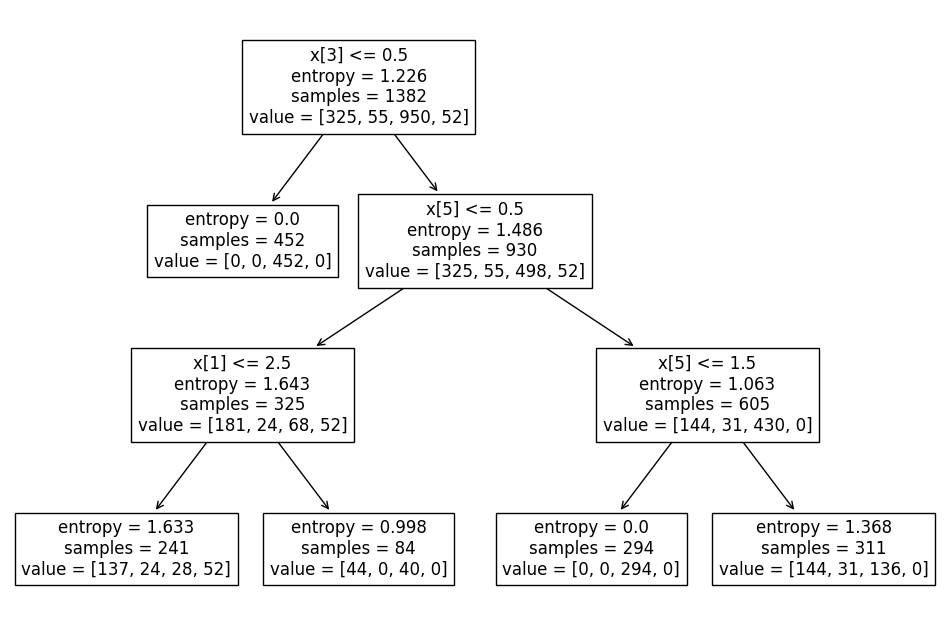

In [78]:
#plot the figure 
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [79]:
#Predict the values 
y_pred_en = clf_en.predict(X_test)
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.7890
Training-set accuracy score: 0.7750


In [80]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7750
Test set score: 0.7890
